<a href="https://colab.research.google.com/github/temple17/matplotlib-practice/blob/main/16_Fill_Between_and_Alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install matplotlib --upgrade

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

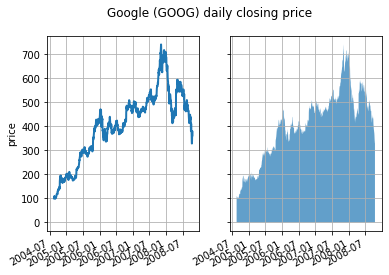

In [3]:
# Load up sample financial data
r = (cbook.get_sample_data('goog.npz', np_load=True)['price_data'].view(np.recarray))

# create the two subplots with the shared x and y axes
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

pricemin = r.close.min()

ax1.plot(r.date, r.close, lw=2)
ax2.fill_between(r.date, r.close, alpha=0.7)

for ax in ax1, ax2:
    ax.grid(True)

ax1.set_ylabel('price')
for label in ax2.get_yticklabels():
    label.set_visible(False)

fig.suptitle('Google (GOOG) daily closing price')
fig.autofmt_xdate()

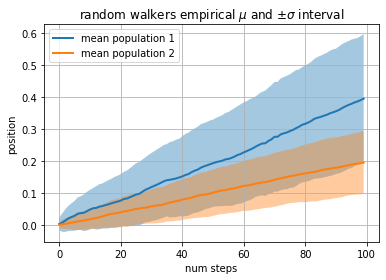

In [4]:
# Fixing random state for reproducibilty
np.random.seed(19680801)

Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# an (Nsteps x Nwalkers) array of random walk steps
S1 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)
S2 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)

# Nsteps Length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='mean population 1')
ax.plot(t, mu2, lw=2, label='mean population 2')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='C0', alpha=0.4)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='C1', alpha=0.4)
ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

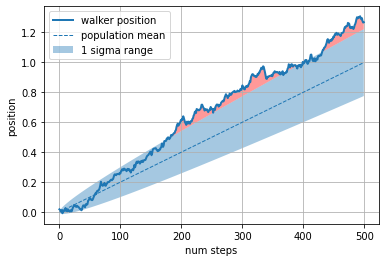

In [5]:
# Fixing random state for reproducibility
np.random.seed(1)

Nsteps = 500
t = np.arange(Nsteps)

mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and Lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)

fig, ax = plt.subplots(1)
ax.plot(t, X, lw=2, label = 'walker position')
ax.plot(t, mu*t, lw=1, label = 'population mean', color='C0', ls='--')
ax.fill_between(t, lower_bound, upper_bound, facecolor='C0', alpha=0.4, label='1 sigma range')
ax.legend(loc='upper left')

# here we use the where argument to only fill the region where the
# walker is above the population 1 sigma boundary

ax.fill_between(t, upper_bound, X, where=X > upper_bound, fc='red', alpha=0.4)
ax.fill_between(t, lower_bound, X, where=X < lower_bound, fc='red', alpha=0.4)
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()